In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib notebook

In [3]:
raw_split = np.genfromtxt("PM-simplex-T550-simplex-SPLIT-PM.csv", 
                          delimiter=',', skip_header = False)

In [69]:
def data_generate(raw_split, filt = False):
    xs_raw = raw_split[:,0]
    ys_raw = raw_split[:,1]
    zs_raw = raw_split[:,3]
    fv_raw = raw_split[:,4]
    K1_raw = raw_split[:,5]
    K2_raw = raw_split[:,6]
    K3_raw = raw_split[:,7]
    
    nr = raw_split.shape[0]
    
    xs = []
    ys = []
    zs = []
    K1 = []
    K2 = []
    K3 = []
    fv = []
    
    #print nc
    
    for i in range(nr):
        if filt:
            if fv_raw[i] > 3e-4 and fv_raw[i] < 1.0 - 3e-4 \
                and K1_raw[i] > 1e-30 and K2_raw[i] > 1e-30 \
                and K3_raw[i] > 1e-30:
                xs.append(xs_raw[i])
                ys.append(ys_raw[i])
                zs.append(zs_raw[i])
                K1.append(K1_raw[i])
                K2.append(K2_raw[i])
                K3.append(K3_raw[i])
                fv.append(fv_raw[i])
        else:
            xs.append(xs_raw[i])
            ys.append(ys_raw[i])
            zs.append(zs_raw[i])
            K1.append(K1_raw[i])
            K2.append(K2_raw[i])
            K3.append(K3_raw[i])
            fv.append(fv_raw[i])

    return xs, ys, zs, np.array(K1), np.array(K2), np.array(K3), np.array(fv)

In [74]:
def draw_split_data(data_file, target_file = None, plot_name = None):
    
    raw_split = np.genfromtxt(data_file, 
                              delimiter=',', 
                              skip_header = False)
    
    xs, ys, zs, K1, K2, K3, fv = data_generate(raw_split)
    
    if target_file is not None:
        target_raw = np.genfromtxt(target_file, 
                                   delimiter=',', 
                                   skip_header = False)
        _, _, _, K1_target, K2_target, K3_target, fv_target = data_generate(target_raw, filt = True)

    rotate_xs = []
    rotate_ys = []
    for x0, y0 in zip(xs, ys):
        new_x = x0 + y0 * np.cos(np.pi / 3.0)
        new_y = y0 * np.sin(np.pi / 3.0)
        rotate_xs.append(new_x)
        rotate_ys.append(new_y)
    
    rotate_xs = np.array(rotate_xs)
    rotate_ys = np.array(rotate_ys)
    zs = np.array(zs)
    
    rotate_x = []
    rotate_y = []
    #z_zero = []
    for x0, y0 in zip(raw_split[:,0], raw_split[:,1]):
        new_x = x0 + y0 * np.cos(np.pi / 3.0)
        new_y = y0 * np.sin(np.pi / 3.0)
        rotate_x.append(new_x)
        rotate_y.append(new_y)
        #z_zero.append(0.0)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    p = ax.scatter(rotate_xs, rotate_ys, zs, c = fv, marker = "o", 
               cmap = 'rainbow', s = 1)
    #ax.plot_trisurf(rotate_x, rotate_y, z_zero,
    #                cmap="coolwarm")
    fig.colorbar(p)
    ax.set_title('Mole Fraction of Vapor Phase')
    plt.show()
    
    plt.savefig("split_data_fv.eps")
    plt.savefig("split_data_fv.pdf")
    
    if target_file is not None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        error = fv - fv_target
        rotate_xs0 = rotate_xs[np.where(error < 10.0)]
        rotate_ys0 = rotate_ys[np.where(error < 10.0)]
        zs0 = zs[np.where(error < 10.0)]
        error = error[np.where(error < 10.0)]
        rotate_xs0 = rotate_xs0[np.where(error > -10.0)]
        rotate_ys0 = rotate_ys0[np.where(error > -10.0)]
        zs0 = zs0[np.where(error > -10.0)]
        error = error[np.where(error > -10.0)]
        p = ax.scatter(rotate_xs0, rotate_ys0, zs0, 
                       c = error, marker = "o", 
                       cmap = 'rainbow', s = 1)
        fig.colorbar(p)
        ax.set_title('$F_v$ error')
        plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    p = ax.scatter(xs, ys, zs, c = np.log(K1), marker = "o", 
               cmap = 'rainbow', s = 1)
    fig.colorbar(p)
    ax.set_title('K-values, $K_1$')
    plt.show()
    
    plt.savefig("split_data_K1.eps")
    plt.savefig("split_data_K1.pdf")
    
    if target_file is not None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        p = ax.scatter(rotate_xs, rotate_ys, zs, 
                       c = (K1 - K1_target),
                       marker = "o", 
                       cmap = 'rainbow', s = 1)
        fig.colorbar(p)
        ax.set_title('$K_1$ error')
        plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    p = ax.scatter(xs, ys, zs, c = K2, marker = "o", 
               cmap = 'rainbow', s = 1)
    fig.colorbar(p)

    ax.set_title('K-values, $K_2$')
    plt.show()
    
    plt.savefig("split_data_K2.eps")
    plt.savefig("split_data_K2.pdf")
    
    if target_file is not None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        p = ax.scatter(rotate_xs, rotate_ys, zs, 
                       c = (K2 - K2_target), 
                       marker = "o", 
                       cmap = 'rainbow', s = 1)
        fig.colorbar(p)
        ax.set_title('$K_2$ error')
        plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    p = ax.scatter(xs, ys, zs, c = K3, marker = "o", 
               cmap = 'rainbow', s = 1)
    fig.colorbar(p)
    ax.set_title('K-values, $K_3$')
    plt.show()
    
    plt.savefig("split_data_K3.eps")
    plt.savefig("split_data_K3.pdf")
    
    if target_file is not None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        p = ax.scatter(rotate_xs, rotate_ys, zs, 
                       c = (K3 - K3_target), 
                       marker = "o", 
                       cmap = 'rainbow', s = 1)
        fig.colorbar(p)
        ax.set_title('$K_3$ error')
        plt.show()

<IPython.core.display.Javascript object>


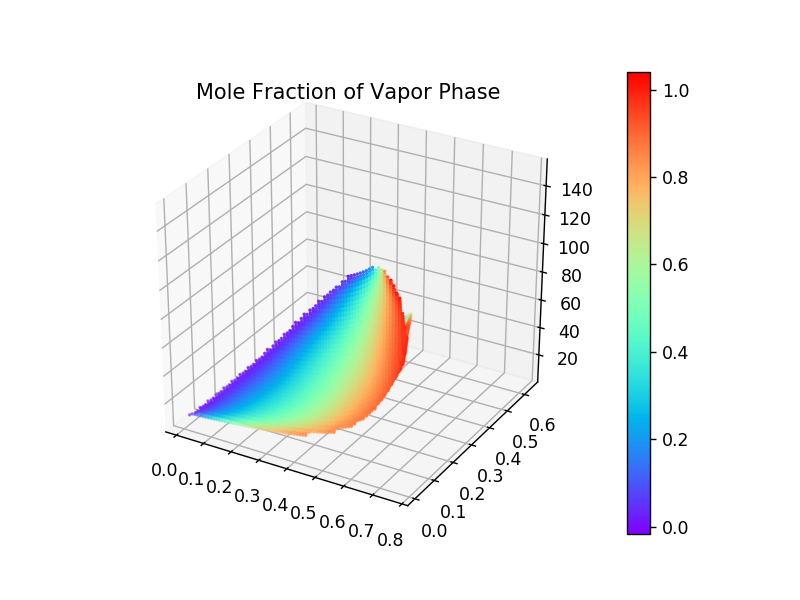

<IPython.core.display.Javascript object>


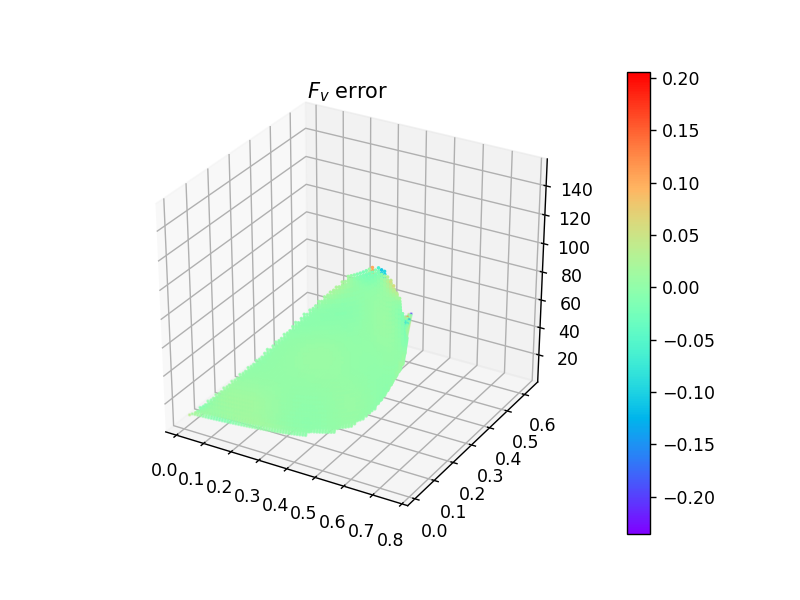

<IPython.core.display.Javascript object>


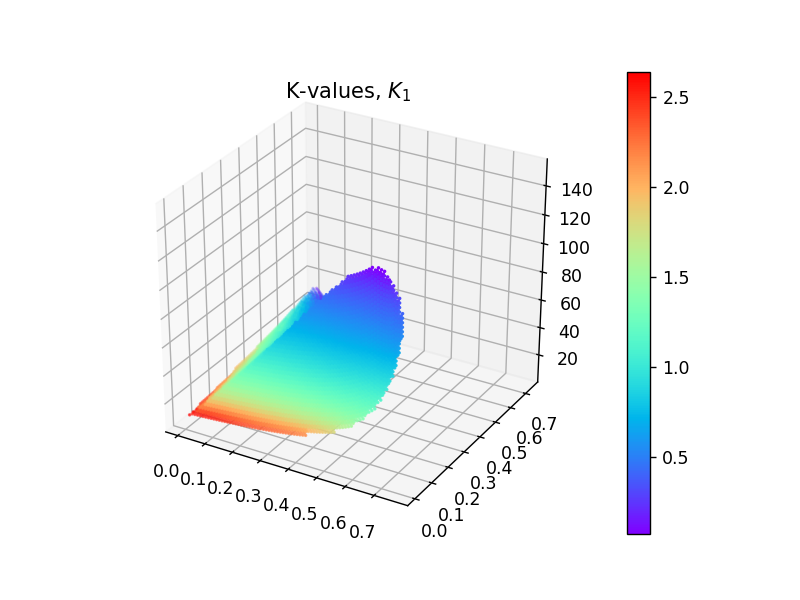

<IPython.core.display.Javascript object>


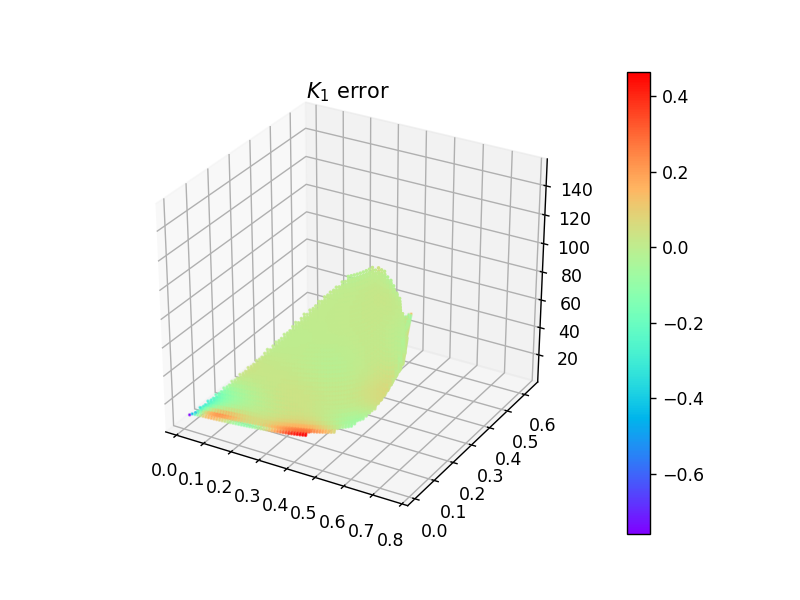

<IPython.core.display.Javascript object>


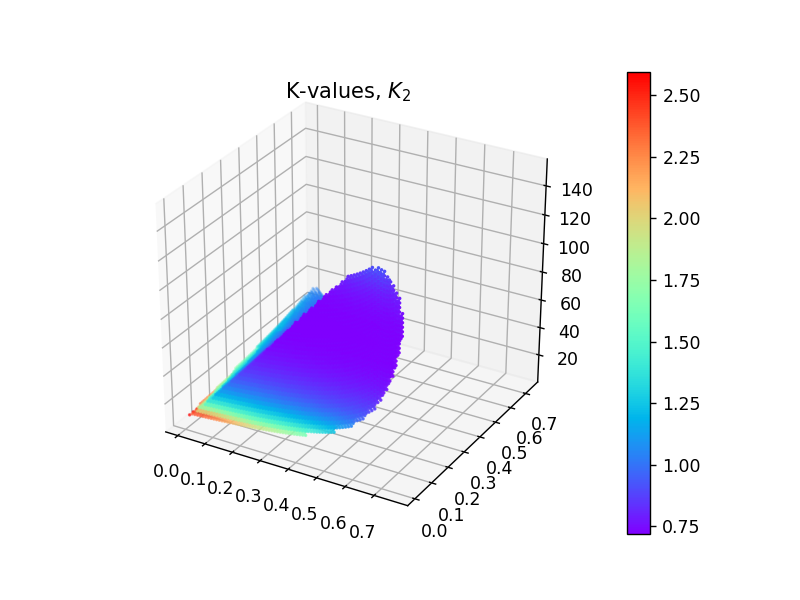

<IPython.core.display.Javascript object>


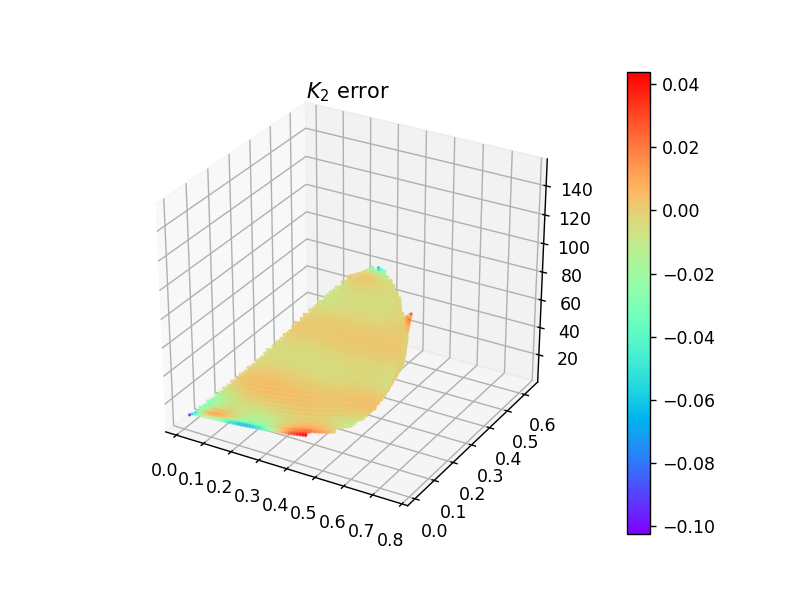

<IPython.core.display.Javascript object>


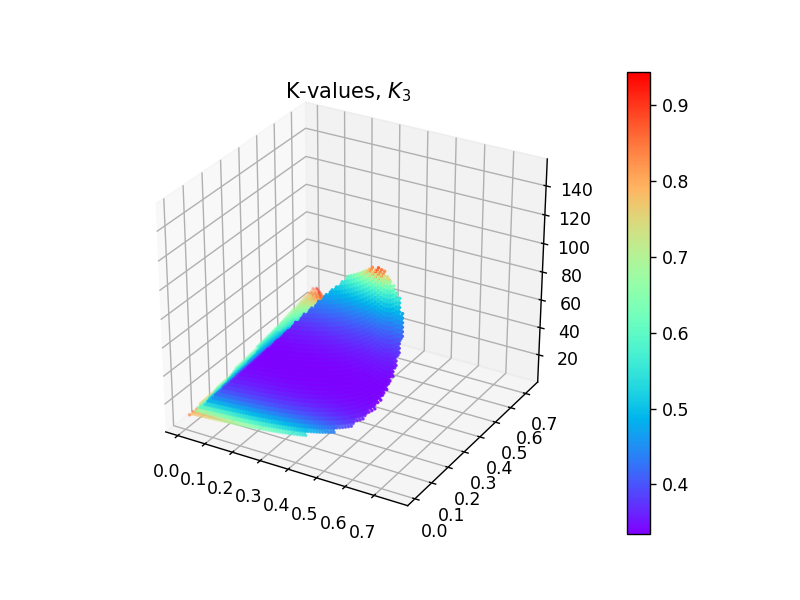

<IPython.core.display.Javascript object>


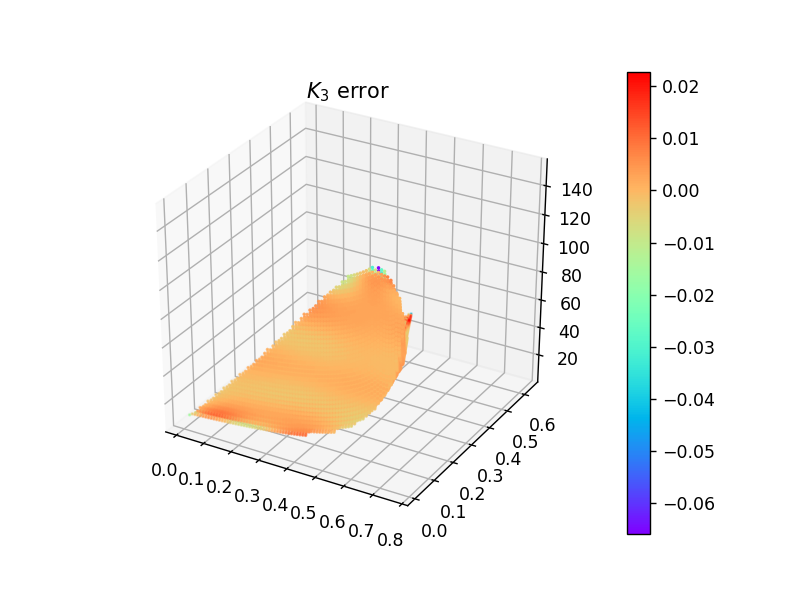

In [75]:
draw_split_data("split-prediction.csv", target_file = "PM-simplex-T550-simplex-SPLIT-PM.csv")